# _WİNE DATASET_

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.cluster import KMeans
from warnings import filterwarnings
filterwarnings("ignore")
from mpl_toolkits.mplot3d import Axes3D
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering




<Figure size 432x216 with 0 Axes>

<Figure size 432x216 with 0 Axes>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# _1)Data Visualization and Understanding Data_


In [ ]:
data = pd.read_csv("/content/drive/Othercomputers/My Laptop/college/Final Year Project/ML Project/Project/wine-clustering.csv")
data.head(-1)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,14.16,2.51,2.48,20.0,91,1.68,0.70,0.44,1.24,9.70,0.62,1.71,660
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic_Acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Ash_Alcanity,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total_Phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid_Phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
Color_Intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


In [ ]:
data.isnull().sum().sum()

0

In [ ]:
data[data.notnull().any(axis = 1)][0:5]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


<Figure size 720x576 with 0 Axes>

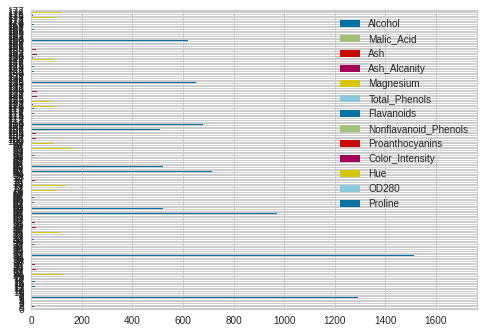

In [ ]:
data.plot.barh()

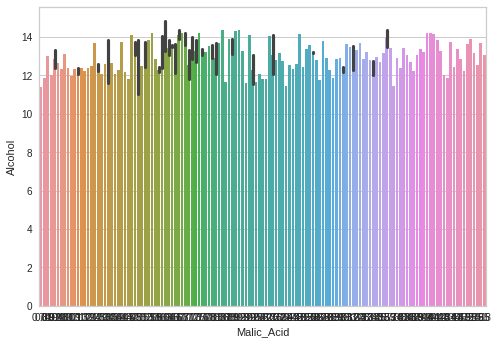

In [ ]:
sbn.barplot(x = "Malic_Acid", y = "Alcohol", data = data);

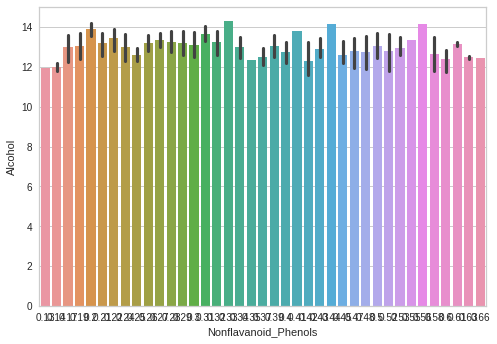

In [ ]:
sbn.barplot(x = "Nonflavanoid_Phenols", y = "Alcohol", data = data);

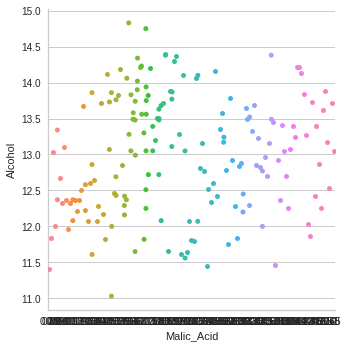

In [ ]:
sbn.catplot(x = "Malic_Acid", y = "Alcohol", data = data);

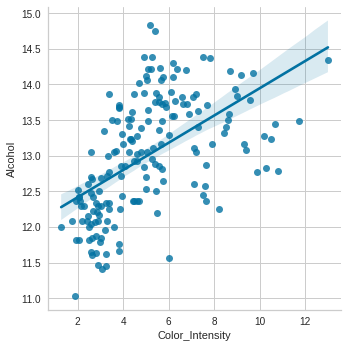

In [ ]:
sbn.lmplot(x = "Color_Intensity", y ="Alcohol", data = data);

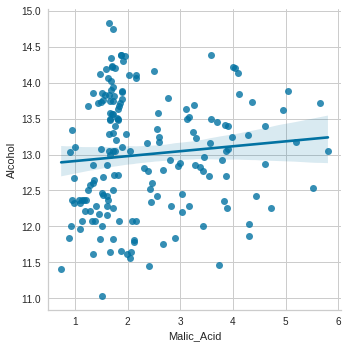

In [ ]:
sbn.lmplot(x = "Malic_Acid", y ="Alcohol", data = data)

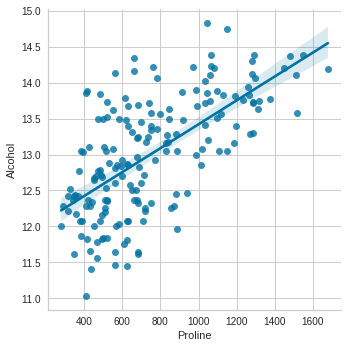

In [ ]:
sbn.lmplot(x = "Proline", y ="Alcohol", data = data)

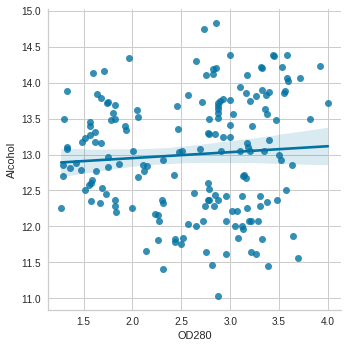

In [ ]:
sbn.lmplot(x = "OD280", y ="Alcohol", data = data)

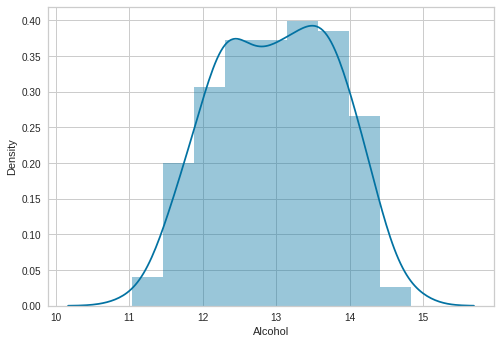

In [ ]:
sbn.distplot(data.Alcohol, kde = True);

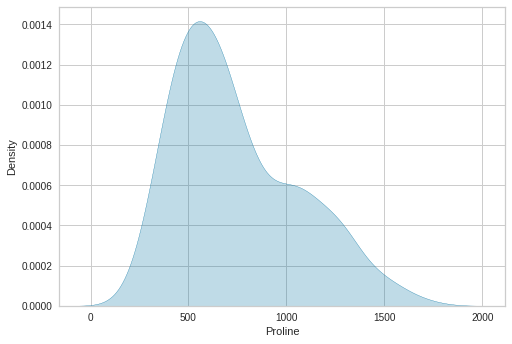

In [ ]:
sbn.kdeplot(data.Proline, shade = True );

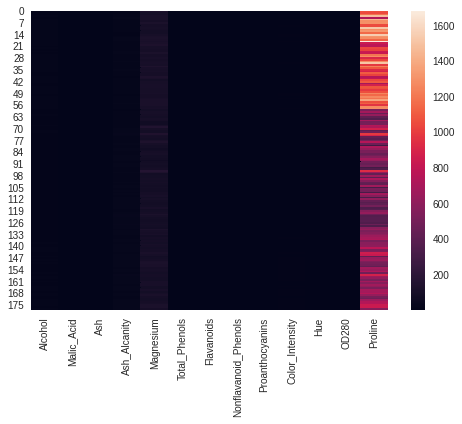

In [ ]:
sbn.heatmap(data)

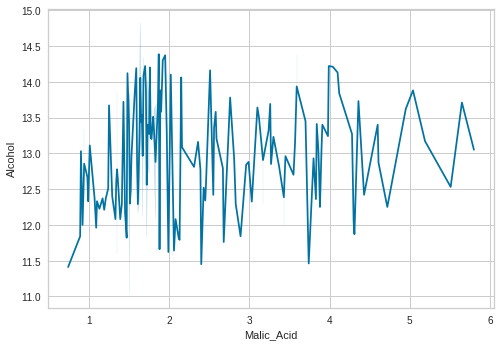

In [ ]:
sbn.lineplot(x = "Malic_Acid", y = "Alcohol", data = data)

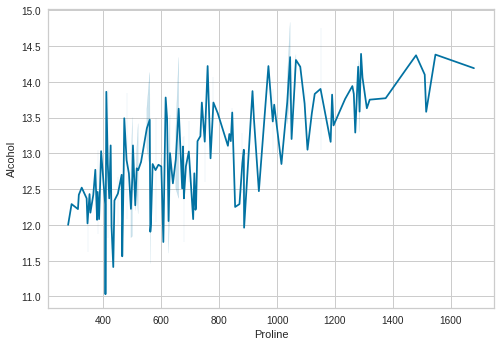

In [ ]:
sbn.lineplot(x = "Proline", y = "Alcohol", data = data)

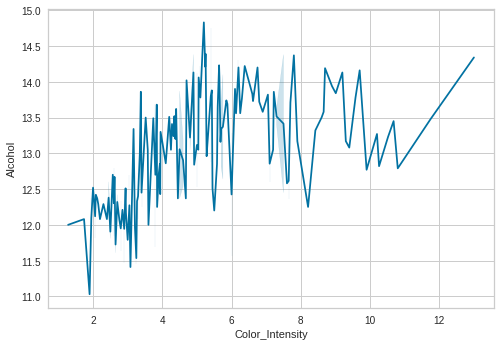

In [ ]:
sbn.lineplot(x = "Color_Intensity", y = "Alcohol", data = data)

# _2) KMeans_

In [ ]:
kmeans = KMeans(n_clusters = 2)

In [ ]:
k_fit = kmeans.fit(data)

In [ ]:
merkezler = k_fit.cluster_centers_

In [ ]:
kumeler = k_fit.labels_

# _2.a) KMeans Visualization_

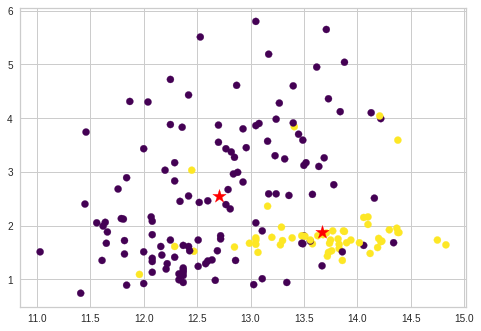

In [ ]:
plt.scatter(data.iloc[:,0],  data.iloc[:,1], c = kumeler, s = 50, cmap = "viridis")
plt.scatter(merkezler[:,0], merkezler[:,1], c = "red", s = 200, marker = "*")

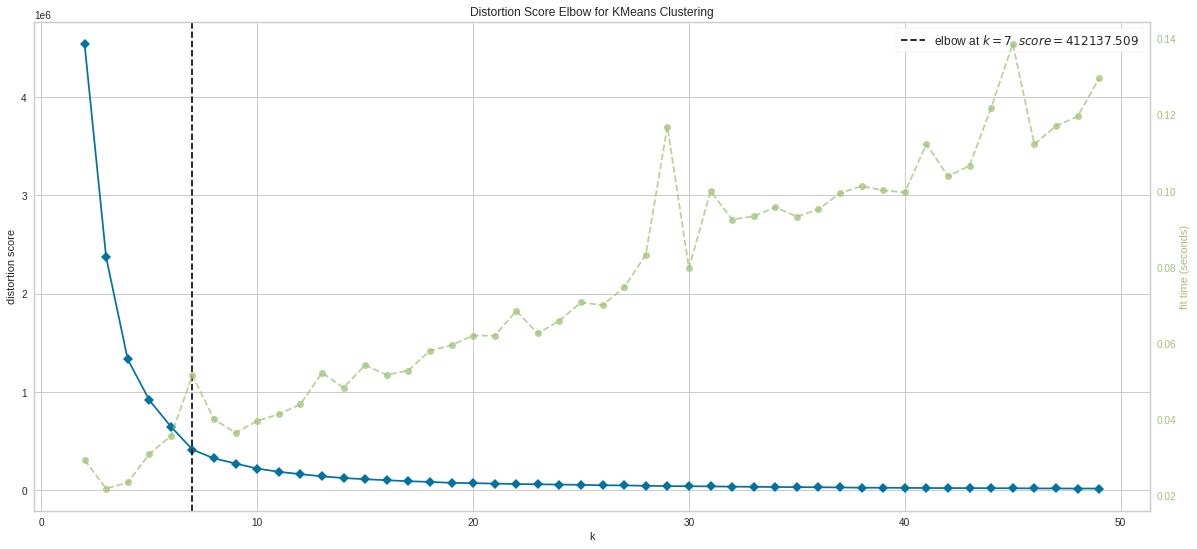

In [ ]:
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k = (2,50))
visualizer.fit(data)
visualizer.poof();

# _2.b) PCA for KMeans_


In [ ]:
data[0:5]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
df = StandardScaler().fit_transform(data)


In [ ]:
df[0:4, 0:4]

array([[ 1.51861254, -0.5622498 ,  0.23205254, -1.16959318],
       [ 0.24628963, -0.49941338, -0.82799632, -2.49084714],
       [ 0.19687903,  0.02123125,  1.10933436, -0.2687382 ],
       [ 1.69154964, -0.34681064,  0.4879264 , -0.80925118]])

In [ ]:
pca = PCA(n_components=4)
pca_fit = pca.fit_transform(df)

In [ ]:
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 ])

In [ ]:
pca = PCA().fit(df)

In [ ]:
dff = pd.DataFrame(data = pca_fit, columns = ["1.component", "2.component", "3.component", "4.component"])

In [ ]:
dff.head()

,1.component,2.component,3.component,4.component
0,3.316751,-1.443463,-0.165739,-0.215631
1,2.209465,0.333393,-2.026457,-0.291358
2,2.516740,-1.031151,0.982819,0.724902
3,3.757066,-2.756372,-0.176192,0.567983
4,1.008908,-0.869831,2.026688,-0.409766


In [ ]:
kmeans = KMeans(n_clusters=4)
k_fit = kmeans.fit(dff)

In [ ]:
clustering = k_fit.labels_

In [ ]:
clusters = data.copy()

In [ ]:
clusters["Clusters for KMeans"] = clustering

In [ ]:
clusters

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Clusters for KMeans
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,3
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,3
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,3
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,3
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,1
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,1
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,1
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,1


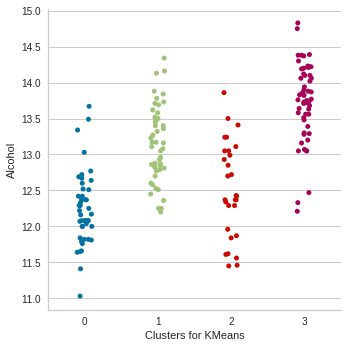

In [ ]:
sbn.catplot(x = "Clusters for KMeans", y = "Alcohol", data = clusters)

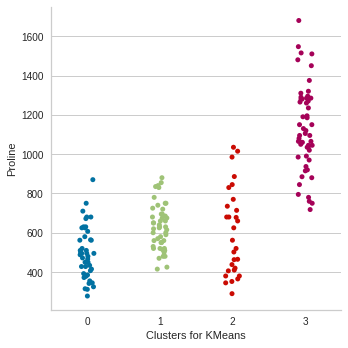

In [ ]:
sbn.catplot(x = "Clusters for KMeans", y = "Proline", data = clusters)

# _3) Hierarchical Clustering_

In [ ]:
data[0:5]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
hc_complete = linkage(data, "complete")

In [ ]:
hc_complete[0:5]

array([[160.        , 165.        ,   2.61070872,   2.        ],
       [ 67.        , 106.        ,   2.65471279,   2.        ],
       [ 13.        ,  50.        ,   2.94961014,   2.        ],
       [  8.        ,   9.        ,   3.27007645,   2.        ],
       [101.        , 119.        ,   3.47925279,   2.        ]])

# _3.a) Dendrogram_

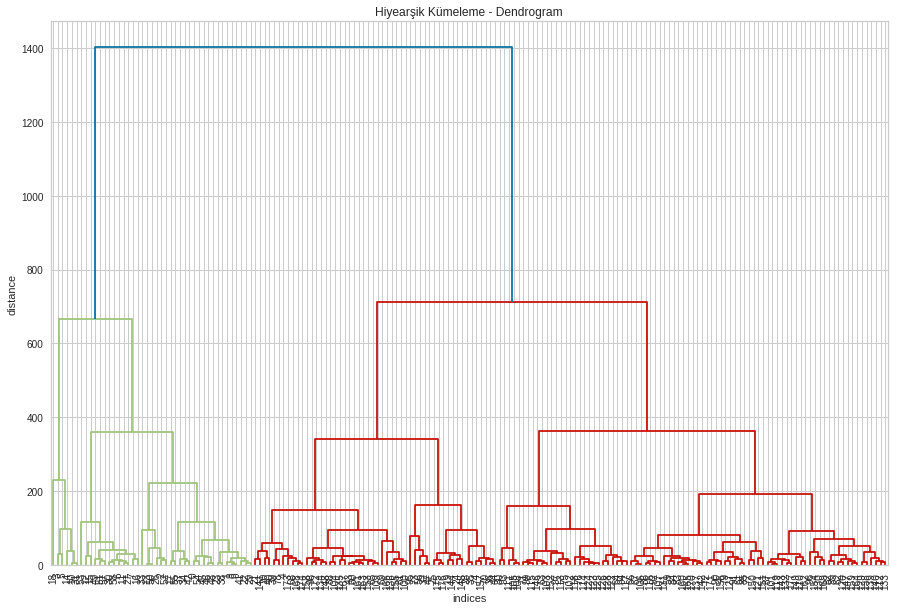

In [ ]:
plt.figure(figsize = (15, 10))
plt.title("Hiyearşik Kümeleme - Dendrogram")
plt.xlabel('indices')
plt.ylabel('distance')
dendrogram(hc_complete,
          leaf_font_size = 10);

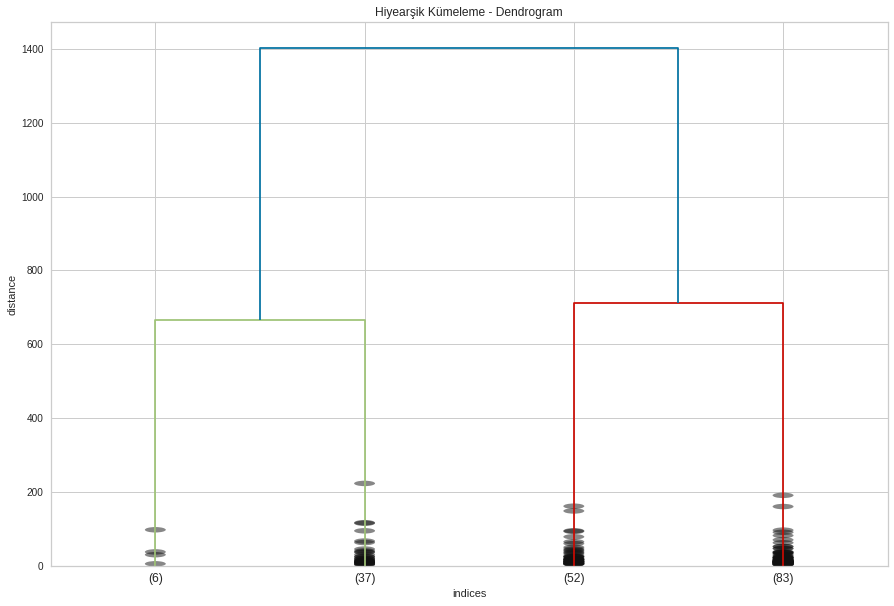

In [ ]:
plt.figure(figsize = (15, 10))
plt.title("Hiyearşik Kümeleme - Dendrogram")
plt.xlabel('indices')
plt.ylabel('distance')
dendrogram(hc_complete,
          truncate_mode="lastp",
          p = 4,
          show_contracted=True);

In [ ]:
hierarchical  = AgglomerativeClustering(n_clusters = 4,
                                  affinity= "euclidean",
                                  linkage = "ward").fit_predict(data)

In [ ]:
dfff = data.copy()

In [ ]:
dfff["Clusters for Hierarchical"] = hierarchical

In [ ]:
dfff[0:5]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Clusters for Hierarchical
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,3
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,3
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,3
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2


In [ ]:
dfff.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline',
       'Clusters for Hierarchical'],
      dtype='object')